# Titanic Data Analysis

##### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

In [2]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set default visualization style
%matplotlib inline
sns.set()

### Exploratory Data Analysis

In [4]:
#First 5 records of the dataset
df = pd.read_csv('titanic.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Last 5 records of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#The shape of the dataset. 891 rows and 12 columns
df.shape

(891, 12)

In [7]:
#Features in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Unique values of the cabin feature
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
#Number of observations in the embarked features
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#Descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Descriptive statistics of embarked feature
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
#Descriptive statistics of sex feature
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

### Dealing with missing values

In [14]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Impute the age feature with strategy mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [16]:
#Change the data type of the age feature
df['Age'] = df['Age'].astype('int')

In [17]:
#Drop unwanted rows on the embarked feature
df.dropna(subset=['Embarked'], inplace = True)

In [18]:
#Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
#Bin fare feature
df['fare_binned'] = pd.qcut(df["Fare"], q = 4, labels = False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [20]:
#Number of binned feature
df['fare_binned'].value_counts()

1    224
0    223
2    222
3    220
Name: fare_binned, dtype: int64

In [21]:
#Create subset of only the numeric columns
df_numeric = df.select_dtypes(include=['int','float'])
df_numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_binned
0,1,0,3,22,1,0,7.2500,0
1,2,1,1,38,1,0,71.2833,3
2,3,1,3,26,0,0,7.9250,1
3,4,1,1,35,1,0,53.1000,3
4,5,0,3,35,0,0,8.0500,1


In [22]:
#Column names of the df_numeric which contains numeric values
df_numeric.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'fare_binned'],
      dtype='object')

### Visual Data Analysis

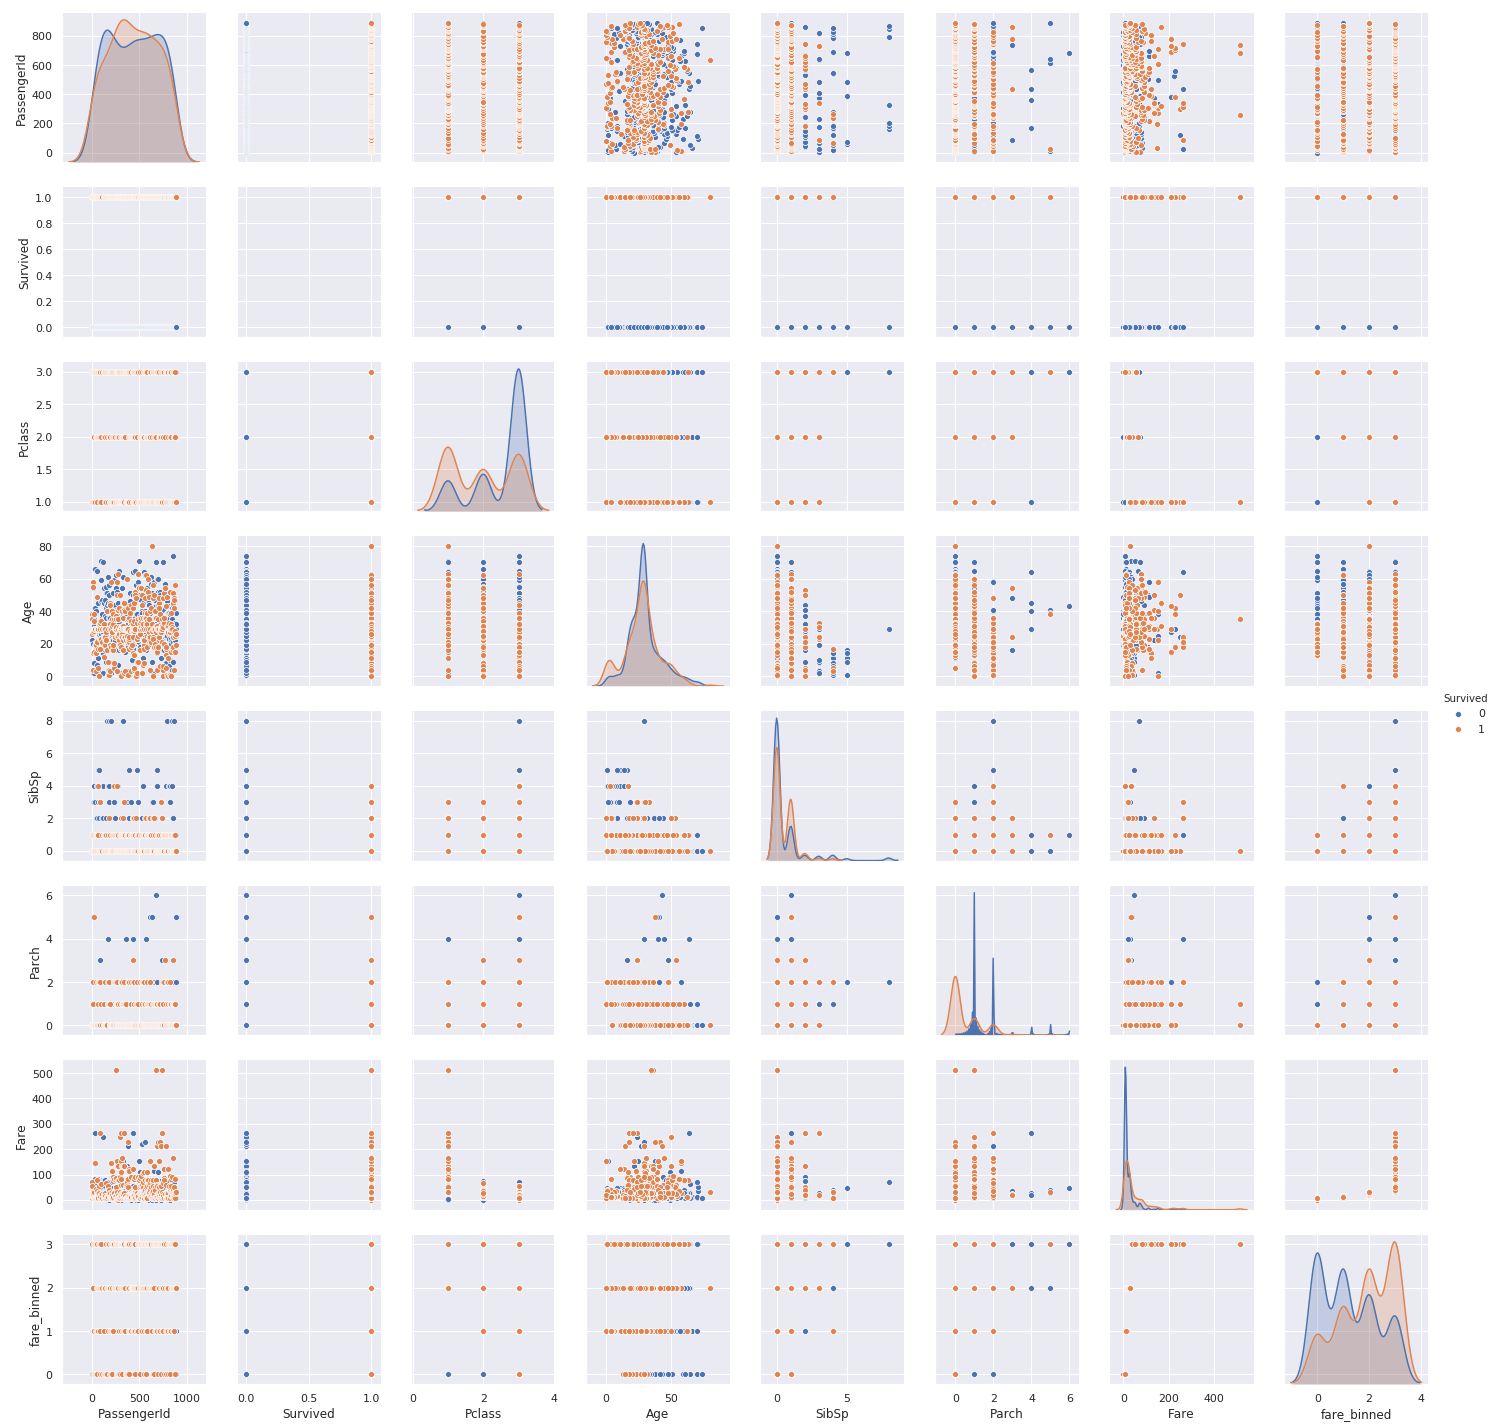

In [24]:
#Pairplot of titanic features
sns.pairplot(df, hue = 'Survived')

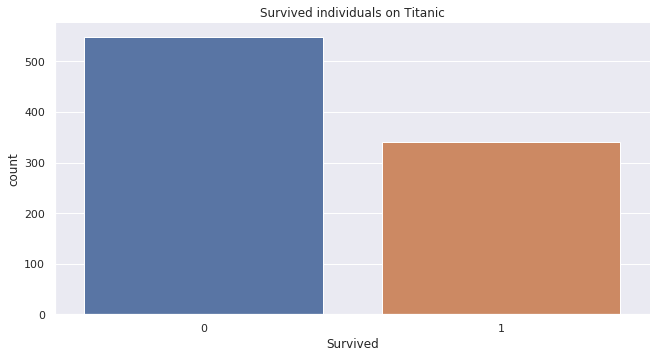

In [25]:
#Countplot of survived features
g = sns.catplot(x = 'Survived', kind = 'count', data = df)
plt.title('Survived individuals on Titanic')
g.fig.set_figwidth(10)

Text(0.5, 1.0, 'Count number of people embarked on Titanic based on sex')

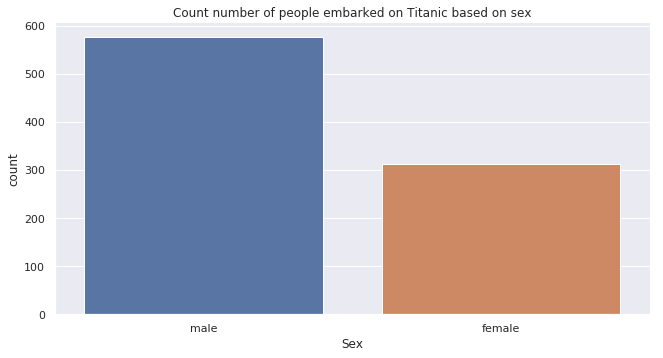

In [26]:
#Count plot of number of sex features
sns.set_style('darkgrid')
g = sns.catplot(x = 'Sex', kind = 'count', data = df)
g.fig.set_figwidth(10)
plt.title('Count number of people embarked on Titanic based on sex')

Text(0.5, 1.0, 'Count number of people embarked on Titanic based on sex')

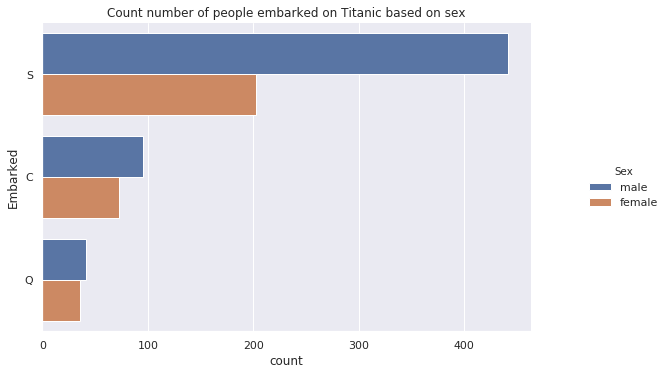

In [27]:
#Count plot of embarked feature
sns.set_style('darkgrid')
g = sns.catplot(y = 'Embarked', kind = 'count', data = df, hue = 'Sex')
g.fig.set_figwidth(10)
plt.title('Count number of people embarked on Titanic based on sex')

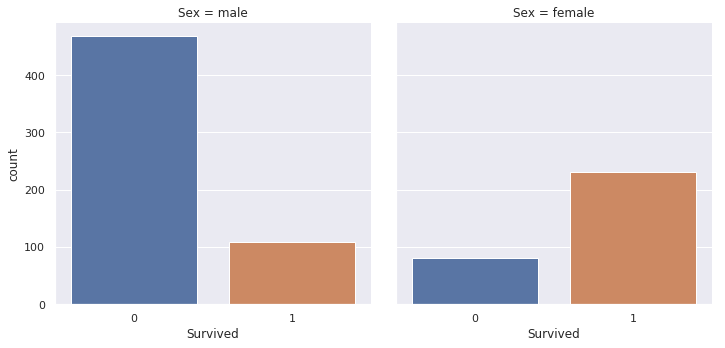

In [28]:
#Countplot based on survival of sex
sns.catplot(x = 'Survived', kind = 'count', col ='Sex', data = df)

Text(0.5, 1.0, 'Distribution of Age in Titanic')

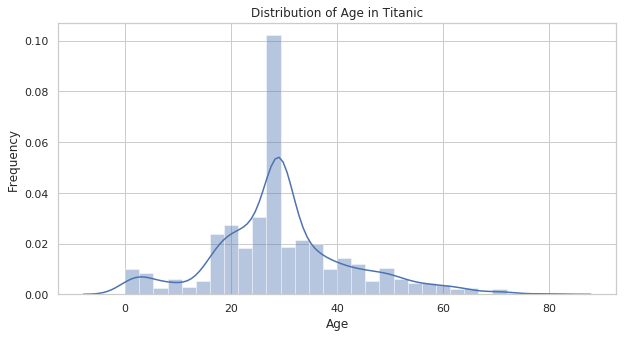

In [29]:
#Distribution plot of age
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df['Age'])
plt.ylabel('Frequency')
plt.title('Distribution of Age in Titanic')

Text(0.5, 1.0, 'Fare distribution in Titanic')

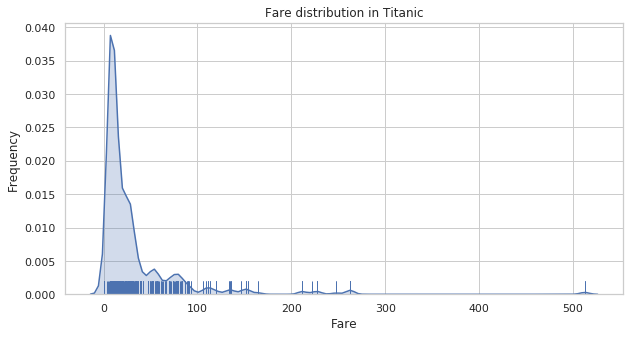

In [30]:
#Distriution plot of fare
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df['Fare'],hist=False, rug=True, kde_kws={'shade':True})
plt.ylabel('Frequency')
plt.title('Fare distribution in Titanic')

In [31]:
#Dataframe of survived and not survived
df_notsurvived = df[df['Survived'] == 0]
df_survived = df[df['Survived'] == 1]

Text(0.5, 1.0, 'KDE plot of Age based on survival')

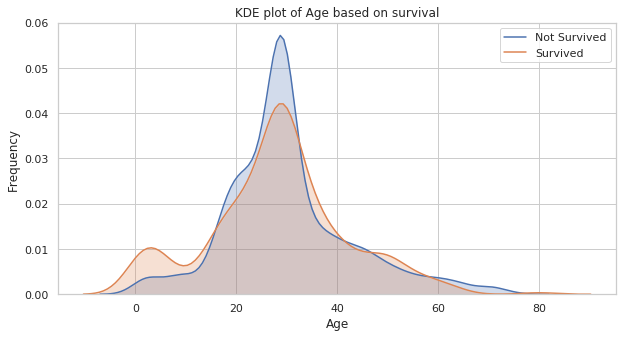

In [32]:
#KDE plot of survival based on Age
plt.figure(figsize=(10,5))
sns.kdeplot(data = df_notsurvived['Age'], shade=True, label='Not Survived')
sns.kdeplot(data = df_survived['Age'], shade=True, label='Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('KDE plot of Age based on survival')

Text(0.5, 1.0, 'Histogram of Age in Titanic')

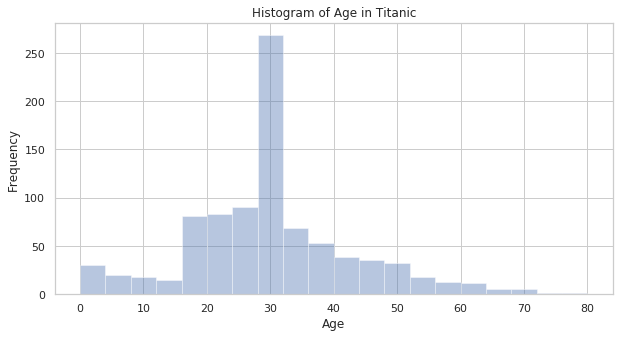

In [33]:
#Histogram of the age feature
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df['Age'],kde=False, bins=20)
plt.ylabel('Frequency')
plt.title('Histogram of Age in Titanic')

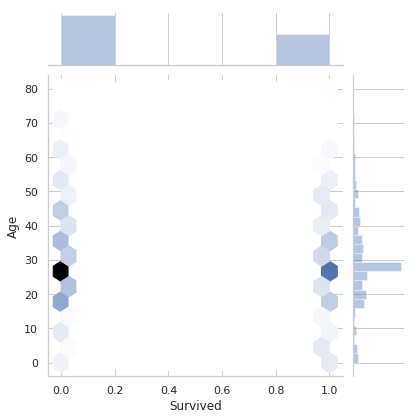

In [34]:
#Joint Plot
sns.jointplot(x = 'Survived', y = 'Age', kind = 'hex', data = df)

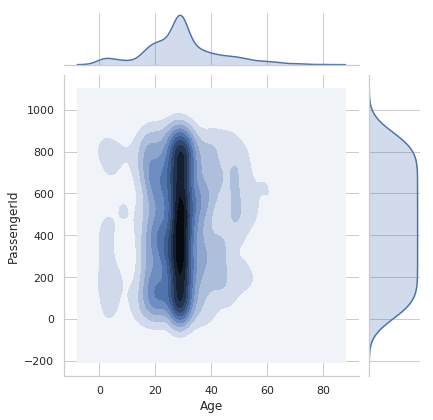

In [35]:
#2d=D KDE PLOT (Kernel Density Estimate)
sns.jointplot(x = 'Age', y = 'PassengerId', kind = 'kde', data = df)

Text(0.5, 1.0, 'Scattter plot of Fare vs Age based on Sex')

<Figure size 720x360 with 0 Axes>

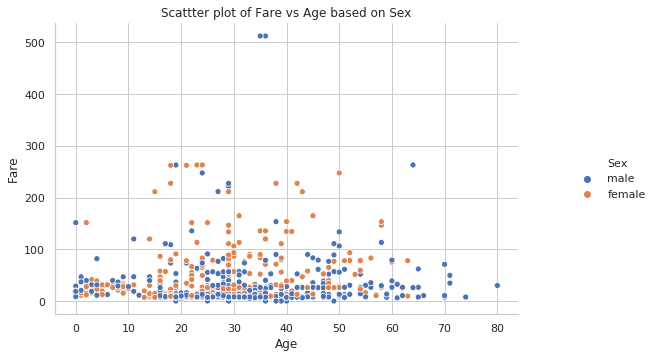

In [36]:
#Scatter plot of Age vs Fare
plt.figure(figsize=(10,5))
g = sns.relplot(x = 'Age', y = 'Fare', kind = 'scatter', data = df, hue ='Sex')
g.fig.set_figwidth(10)
plt.title('Scattter plot of Fare vs Age based on Sex')

<Figure size 1080x720 with 0 Axes>

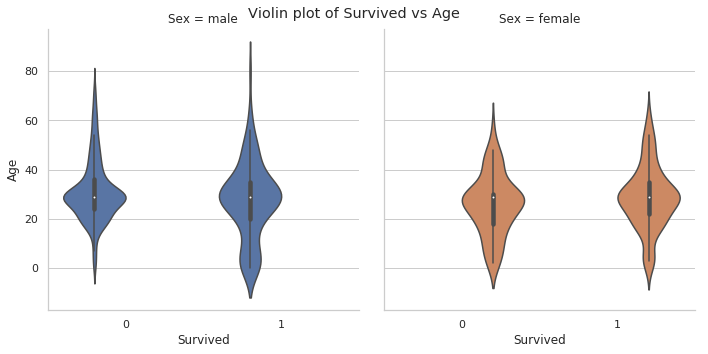

In [37]:
#Violin plot of survived vs age features
plt.figure(figsize=(15,10))
s = sns.catplot(x = 'Survived', y='Age', kind = 'violin',data = df, hue = 'Sex',col='Sex')
s.fig.suptitle('Violin plot of Survived vs Age')
plt.show()

Text(0.5, 1.0, 'Swarm plot of Fare vs Survived based on Sex')

<Figure size 720x360 with 0 Axes>

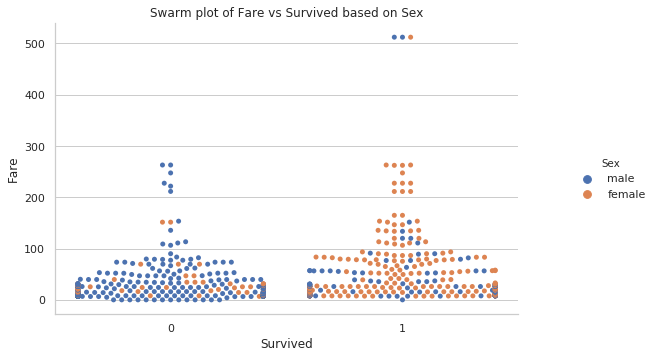

In [38]:
#Swarm plot of survived vs fare features
plt.figure(figsize=(10,5))
g = sns.catplot(x = 'Survived',y ='Fare', kind = 'swarm', data = df, hue = 'Sex')
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
plt.title('Swarm plot of Fare vs Survived based on Sex')

Text(0.5, 1.0, 'Box plot of Embarked vs Age')

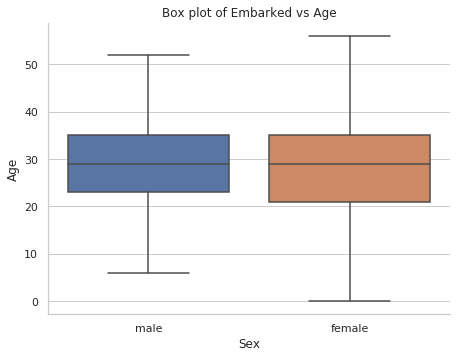

In [39]:
#Box plot of sex vs age feature
g = sns.catplot(x = 'Sex', y = 'Age', kind ='box', data = df, sym="")
g.fig.set_figwidth(7)
plt.title('Box plot of Embarked vs Age')

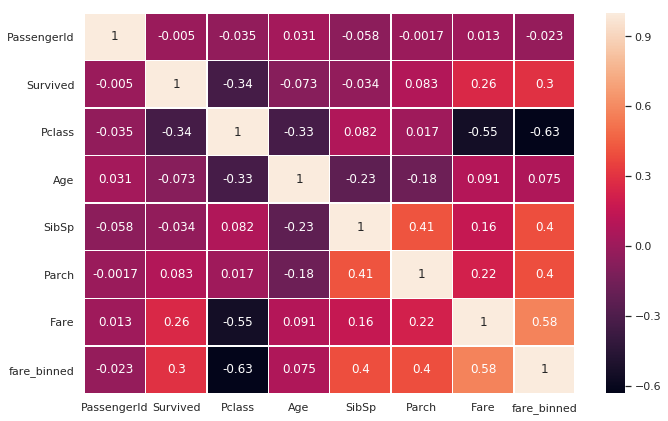

In [40]:
#Heatmap of the correlation of titanic features
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

### Feature Engineering

In [42]:
#Creating new dataframe for cabin null values
df['Has_Cabin'] = df['Cabin'].isnull()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_binned,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,True


In [43]:
#One hot encode embarked and Sex features
df = pd.get_dummies(df,columns=['Embarked', 'Sex','Has_Cabin'])

In [44]:
#Drop features will string observations
df = df.drop(['Name','Ticket','fare_binned'], axis = 1)

In [47]:
#Drop the cabin feature
df = df.drop('Cabin', axis = 1)

In [48]:
#Dataframe of cleaned data
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Has_Cabin_False,Has_Cabin_True
0,1,0,3,22,1,0,7.2500,0,0,1,0,1,0,1
1,2,1,1,38,1,0,71.2833,1,0,0,1,0,1,0
2,3,1,3,26,0,0,7.9250,0,0,1,1,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1,1,0,1,0
4,5,0,3,35,0,0,8.0500,0,0,1,0,1,0,1


### Build a Model

In [49]:
#Correlation between dependent variable and the independent variables
df.corr()['Survived'].sort_values(ascending = False)

Survived           1.000000
Sex_female         0.541585
Has_Cabin_False    0.313435
Fare               0.255290
Embarked_C         0.169966
Parch              0.083151
Embarked_Q         0.004536
PassengerId       -0.005028
SibSp             -0.034040
Age               -0.072695
Embarked_S        -0.151777
Has_Cabin_True    -0.313435
Pclass            -0.335549
Sex_male          -0.541585
Name: Survived, dtype: float64

In [50]:
#Independent variables
X = df[['Sex_female','Has_Cabin_False','Fare','Embarked_C','Parch','Embarked_Q','SibSp','Pclass']].values
X[0:5]

array([[ 0.    ,  0.    ,  7.25  ,  0.    ,  0.    ,  0.    ,  1.    ,
         3.    ],
       [ 1.    ,  1.    , 71.2833,  1.    ,  0.    ,  0.    ,  1.    ,
         1.    ],
       [ 1.    ,  0.    ,  7.925 ,  0.    ,  0.    ,  0.    ,  0.    ,
         3.    ],
       [ 1.    ,  1.    , 53.1   ,  0.    ,  0.    ,  0.    ,  1.    ,
         1.    ],
       [ 0.    ,  0.    ,  8.05  ,  0.    ,  0.    ,  0.    ,  0.    ,
         3.    ]])

In [51]:
#Dependent variables
y = df['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

### Train Model

In [52]:
#Divide features into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(711, 8) (711,)
(178, 8) (178,)


In [53]:
#Normalize the independent variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
#Modelling
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1,max_iter=10,fit_intercept=True,solver='liblinear' ,random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
print('Logistic Regression coefficient (m)', classifier.coef_)
print('Logistic Regression intercept (b)', classifier.intercept_)

Logistic Regression coefficient (m) [[ 1.18074383  0.30894037  0.09118782  0.19743245  0.02593017  0.06898635
  -0.21316294 -0.42061017]]
Logistic Regression intercept (b) [-0.60638072]


In [56]:
#Score of the training set
classifier.score(X_train,y_train)

0.7918424753867792

In [57]:
#Score of the test set
classifier.score(X_test,y_test)

0.8202247191011236

### Test Model

In [58]:
#Actual values
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [59]:
#Predicted values
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [60]:
#Accuracy score of our model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8202247191011236


### Evaluate Model

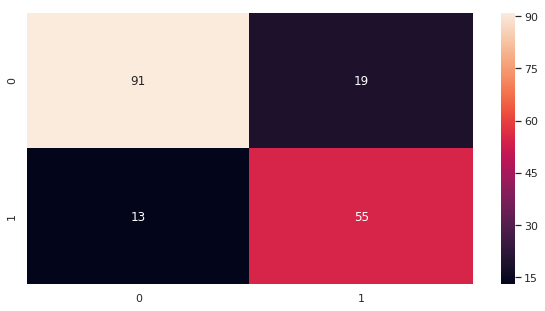

In [61]:
#Performance measuring
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot = True)

In [62]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.74      0.81      0.77        68

   micro avg       0.82      0.82      0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



In [63]:
#Prediction probabilities from the test data
from sklearn.metrics import roc_auc_score
probabilities = classifier.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9051470588235294

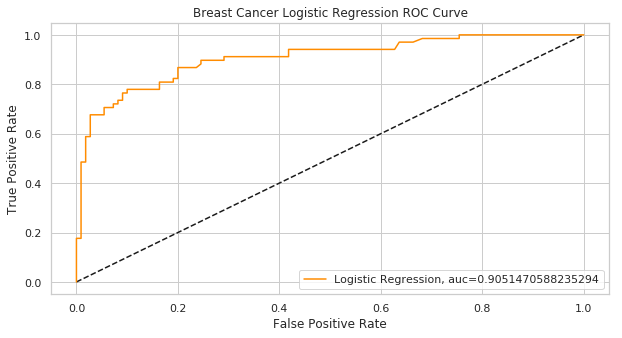

In [64]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pre_prob = classifier.predict_proba(X_test)[::,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pre_prob)
auc = roc_auc_score(y_test, y_pre_prob)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], 'k--', linestyle='--')
plt.plot(fpr, tpr,color = 'darkorange', label="Logistic Regression, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Logistic Regression ROC Curve')
plt.legend(loc=4)
plt.show()

### k-fold cross validation

In [65]:
#Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accuracies

array([0.78321678, 0.81118881, 0.73943662, 0.78169014, 0.73758865])

In [66]:
#mean performance of the cross validation
accuracies.mean()

0.7706242014902488

In [67]:
#standard deviation of the performance of cross validation
accuracies.std()

0.028250764391006197

### Model Perfomance Tunning Using Hyparameter

In [68]:
#Set the parameters
dep = np.arange(10,100)
param_grid = {'max_iter' : dep, 'C' : [1,10], 'random_state' : [1,2000]}

In [69]:
#GridSearch
from sklearn.model_selection import GridSearchCV
classifier_cv = GridSearchCV(classifier, param_grid = param_grid, cv = 5)

In [70]:
#Fit and print best score
classifier_cv.fit(X_train, y_train)
print('Tuned Logistic Regression Parameters: {}'.format(classifier_cv.best_params_))
print('Best score is: {}'.format(classifier_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1, 'max_iter': 10, 'random_state': 1}
Best score is: 0.770745428973277


In [71]:
#Predict the tunned varibles
y_predict = classifier_cv.predict(X_test)
y_predict[0:5]

array([0, 0, 1, 0, 1])

In [72]:
#Accuracy Score
print(accuracy_score(y_test, y_predict))

0.8202247191011236
